### RQ1: What are the distributions of developers that post questions?

In [1]:
import matplotlib.pyplot as plt

%load_ext sql
%sql sqlite:///../data/user_post.db

query = """ WITH uid_c AS (
                SELECT uid, COUNT(*) AS c
                FROM questions
                GROUP BY uid)
            SELECT c, COUNT(*)
                FROM uid_c
                GROUP BY c"""

res = %sql $query
df1 = res.DataFrame()
df1.columns = ["# questions", "# developers"]

# Accumulate proportions
df1['prop developers'] = df1['# developers'].cumsum() / df1['# developers'].sum()
df1

 * sqlite:///../data/user_post.db
Done.


,# questions,# developers,prop developers
0,1,74604,0.884080
1,2,7020,0.967269
2,3,1707,0.987498
3,4,545,0.993956
4,5,230,0.996682
5,6,110,0.997985
6,7,82,0.998957
7,8,32,0.999336
8,9,21,0.999585
9,10,11,0.999716


In [14]:
sum(df1["# developers"])

84386

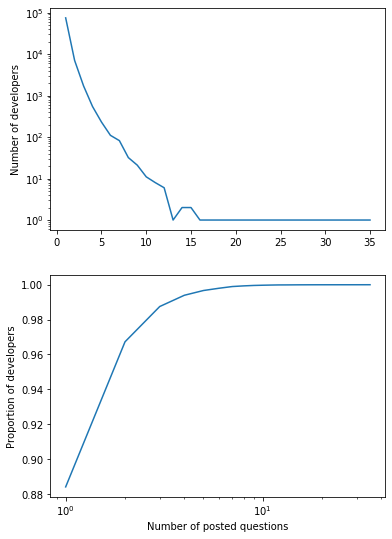

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

# Number of developers
ax1.set_yscale('log', basey=10)
# ax1.set_xlabel("Number of posted questions")
ax1.set_ylabel("Number of developers")
ax1.plot(df1["# questions"], df1["# developers"])

# Accumulater proportion of developers
ax2.set_xscale('log', basex=10)
ax2.set_xlabel("Number of posted questions")
ax2.set_ylabel("Proportion of developers")
ax2.plot(df1['# questions'], df1['prop developers'])

plt.show()

### RQ2: What are the distributions of developers that answer questions?

In [16]:
query = """ WITH uid_c AS (
                SELECT uid, COUNT(*) AS c
                FROM answers
                GROUP BY uid)
            SELECT c, COUNT(*)
                FROM uid_c
                GROUP BY c"""

res = %sql $query
df2 = res.DataFrame()
df2.columns = ["# answers", "# developers"]

# Accumulate proportions
df2['prop developers'] = df2['# developers'].cumsum() / df2['# developers'].sum()
df2

 * sqlite:///../data/user_post.db
Done.


,# answers,# developers,prop developers
0,1,112996,0.792037
1,2,16809,0.909859
2,3,5500,0.948411
3,4,2531,0.966151
4,5,1410,0.976035
...,...,...,...
82,172,1,0.999972
83,176,1,0.999979
84,241,1,0.999986
85,270,1,0.999993


In [18]:
df2[:6]

,# answers,# developers,prop developers
0,1,112996,0.792037
1,2,16809,0.909859
2,3,5500,0.948411
3,4,2531,0.966151
4,5,1410,0.976035
5,6,795,0.981607


In [20]:
sum(df2["# developers"])

142665

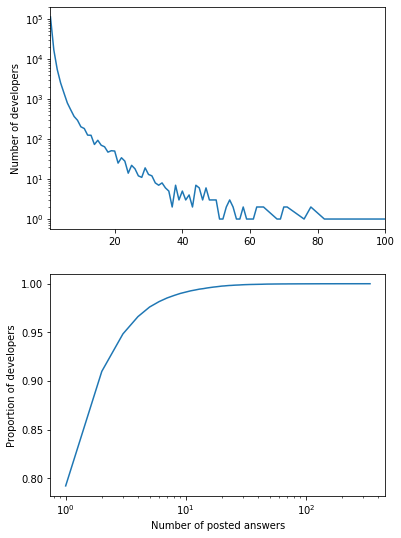

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

# Number of developers
ax1.set_xlim(1, 100)
ax1.set_yscale('log', basey=10)
ax1.set_ylabel("Number of developers")
ax1.plot(df2["# answers"], df2["# developers"])

# Accumulater proportion of developers
ax2.set_xscale('log', basex=10)
ax2.set_xlabel("Number of posted answers")
ax2.set_ylabel("Proportion of developers")
ax2.plot(df2['# answers'], df2['prop developers'])

plt.show()